In [14]:
# utilities 
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Ukraine_10K_tweets_sentiment_analysis.csv")

In [3]:
df.shape

(10167, 4)

## Text Preprocessing 

Processing steps: 

1) Lower Casing: Each text is converted to lowercase.
2) Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
3) Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
4) Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
5) Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
6) Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
7) Removing Short Words: Words with length less than 2 are removed.
8) Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
9) Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [4]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [5]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [6]:
df1 = df.dropna()

In [8]:
df1.head()

,Tweet,polarity,subjectivity,Sentiment
0,RT @ChristopherJM: Zelensky also confirms CIA ...,0.000000,0.000000,Negative
1,RT @oryxspioenkop: Russia acquired these vehic...,-0.100000,0.300000,Positive
2,RT @RepMTG: I’m calling for an audit of every ...,-0.035714,0.607143,Positive
3,"RT @KyivIndependent: ""Russian goal seems to be...",0.034091,0.113636,Negative
4,RT @william98161886: I see Rishi just given an...,-0.325521,0.166667,Positive


In [9]:
df1.describe

<bound method NDFrame.describe of                                                   Tweet  polarity  \
0     RT @ChristopherJM: Zelensky also confirms CIA ...  0.000000   
1     RT @oryxspioenkop: Russia acquired these vehic... -0.100000   
2     RT @RepMTG: I’m calling for an audit of every ... -0.035714   
3     RT @KyivIndependent: "Russian goal seems to be...  0.034091   
4     RT @william98161886: I see Rishi just given an... -0.325521   
...                                                 ...       ...   
9994  RT @RepMTG: I’m calling for an audit of all US...  0.000000   
9995  @kryptedcomedy Actually I’m a Pole born in Lvo... -0.100000   
9996  RT @RT_com: Ukraine admits firing missile near... -0.033333   
9997  RT @ggreenwald: US funding for war in Ukraine ...  0.136364   
9998  RT @valllldo: мелявтан, россиянь агрессиязо эз...  0.000000   

      subjectivity Sentiment  
0         0.000000  Negative  
1         0.300000  Positive  
2         0.607143  Positive  
3         0.1

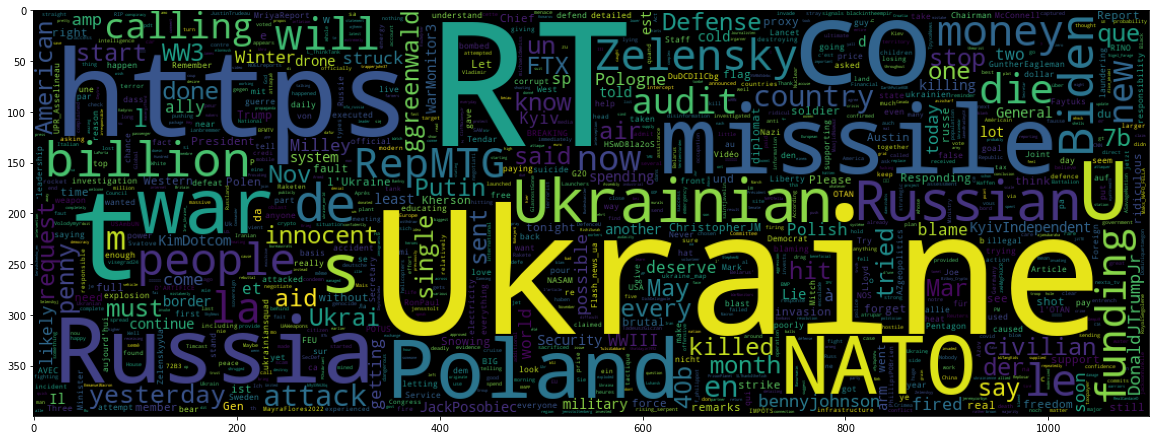

In [11]:
# data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1100 , height = 400,
               collocations=False).generate(" ".join(df1['Tweet']))
plt.imshow(wc)


In [15]:
df_train = df1.sample(frac=0.8, random_state=1)
df_test = df1.drop(df_train.index)

In [18]:
X_train = df_train['Tweet']
y_train = df_train['Sentiment']
X_test = df_test['Tweet']
y_test = df_test['Sentiment']

In [19]:
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [23]:
classifier = MultinomialNB();
classifier.fit(X_train_features, y_train);

In [25]:
accuracy = classifier.score(X_test_features, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.937


In [36]:
new_tweets = ['I despise the ongoing atrocities Russia is committing on Ukraine. War is never the answer, shame on them.', 'I love Ukraine', 'I hate Ukraine']
new_tweet_features = vectorizer.transform(new_tweets)
predictions = classifier.predict(new_tweet_features)
print('Predictions:', predictions)

Predictions: ['Positive' 'Negative' 'Positive']


This dataset is obviously flawed and has been categroized by emojis rather than using a deep analysis of the tweet itself. As you can see the predicted sentiment is almost completely the opposite of what it should be. 